# Notebook destinado a Parte 1 - Resolvendo um Problema Linearmente Separável do Projeto 2 de Redes Neurais 2020.1
## Colaboradores: Jakson Protázio e Nadine Brito

Primeiro importamos as bibliotecas necessárias.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

Em seguida realizamos a leitura do dataset. 

In [3]:
dataset=np.fromfile('data/dataAll.txt')
linhas = len(dataset)//3
colunas=3
dataset=dataset.reshape(linhas, colunas)
print(dataset)

[[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 ...
 [ 872.4311  669.1192    1.    ]
 [ 822.6894 -702.6489    1.    ]
 [-140.147   734.0983    0.    ]]


No passo seguinte iremos iniciar o preenchimento do vetor de pesos.

In [4]:
pesos = np.array([random.uniform(-0.5,0.5),random.uniform(-0.5,0.5),random.uniform(-0.5,0.5)])
    
print(pesos)

[ 0.09188036 -0.11741835 -0.26639536]


Agora verificamos, através de uma soma ponderada e uma função de ativação, se os pesos precisam de ajuste. Para isso, primeiro, preenchemos um vetor com as entradas do dataset.

In [5]:
entradas = np.array([[-1, dataset[0,0], dataset[0,1]]])
for i in range(1, linhas):
    entradas = np.append(entradas, [[-1, dataset[i,0], dataset[i,1]]], axis=0)
print(entradas)

[[  -1.     -363.7884  244.1423]
 [  -1.      328.7572 -256.7658]
 [  -1.     -164.9827  613.2164]
 ...
 [  -1.      872.4311  669.1192]
 [  -1.      822.6894 -702.6489]
 [  -1.     -140.147   734.0983]]


Agora definimos a função que irá realizar a soma ponderada.

In [6]:
def soma(entradas,pesos):
    return(np.dot(entradas,pesos))

Em seguida definimos a função de ativação. Nesse cenário, a pedido do enunciado, adotou-se a função de ativação degrau com limiar sendo 0.

In [7]:
def ativacao(saida):
    if(saida >= 0):
        return 1
    else:
        return 0  

Definimos também a função de ajuste de pesos.

In [8]:
def ajusta(pesos_atuais, yd, y, x):
    taxa = 0.1
    erro = (yd-y)
    mult = taxa*erro
    result = pesos_atuais + np.dot(mult,x)
    return result


A função verifica, será responsável por fazer a chamada das funções para realizar a soma ponderada, função de ativação e a função de ajuste de pesos.

In [9]:
def verifica(pesos):
    qtde_ajuste = 0
    n = len(entradas)
    
    for i in range(n):
        soma_saida = soma(entradas[i], pesos)
        y = ativacao(soma_saida)
        if(y != dataset[i,2]):
            pesos = ajusta(pesos,dataset[i,2],y,entradas[i])
            qtde_ajuste += 1
            print("Pesos ajustados")
            print(pesos)
    
    return pesos,qtde_ajuste

Para dar início ao aprendizado colocamos a chamada da função verifica() em loop, onde a condição de parada é a convergência, ou seja, quando não há mais erros para os exemplos no conjunto de treinamento.

In [10]:
ajustes = np.array([])

parar = False
epocas = 0

while(parar==False):
    resultado = verifica(pesos)
    pesos = resultado[0]
    ajustes = np.append(ajustes,[resultado[1]])
    indice = len(ajustes)
    if(ajustes[indice-1] == 0):
        parar = True
    epocas += 1

Pesos ajustados
[-8.11964010e-03  7.26786017e+01  3.55631646e+01]
Pesos ajustados
[ -0.10811964  73.83184165 -23.28485536]
Pesos ajustados
[-8.11964010e-03 -9.69776835e+00 -1.22410685e+02]
Pesos ajustados
[ 9.18803599e-02  3.94890917e+01 -1.05781955e+02]
Pesos ajustados
[-8.11964010e-03  1.22087792e+02 -2.59261254e+01]
Pesos ajustados
[ 9.18803599e-02  8.20788817e+01 -1.03818815e+02]
Pesos ajustados
[  0.19188036 135.74869165 -54.72654536]
Pesos ajustados
[ 9.18803599e-02  8.27886317e+01 -1.11596005e+02]
Pesos ajustados
[  0.19188036 142.34815165 -61.47367536]
Pesos ajustados
[ 9.18803599e-02  1.09870162e+02 -1.34929495e+02]
Pesos ajustados
[-8.11964010e-03  1.81244672e+02 -7.03873754e+01]
Pesos ajustados
[-1.08119640e-01  1.35720042e+02 -1.36023305e+02]
Pesos ajustados
[-2.08119640e-01  2.18611912e+02 -5.32418154e+01]
Pesos ajustados
[  -0.30811964  172.46453165 -109.89119536]
Pesos ajustados
[  -0.20811964  108.55106165 -194.26561536]
Pesos ajustados
[  -0.30811964  153.14334165 -162

In [11]:
ajustes = ajustes.astype(int)
total_ajustes = np.sum(ajustes)

print('Ao final da execução do algoritmo, podemos verificar que houve um total de ',total_ajustes,' ajuste(s) realizados nos pesos. Para a convergência foram necessárias um total de ',epocas,' épocas. Abaixo pode-se visualizar a quantidade de ajustes realizados em cada época.')
print('')

for i in range(0,len(ajustes)):
    print('Época ',i+1,' => ', ajustes[i],' ajustes')

Ao final da execução do algoritmo, podemos verificar que houve um total de  182  ajuste(s) realizados nos pesos. Para a convergência foram necessárias um total de  11  épocas. Abaixo pode-se visualizar a quantidade de ajustes realizados em cada época.

Época  1  =>  26  ajustes
Época  2  =>  17  ajustes
Época  3  =>  26  ajustes
Época  4  =>  24  ajustes
Época  5  =>  24  ajustes
Época  6  =>  13  ajustes
Época  7  =>  6  ajustes
Época  8  =>  21  ajustes
Época  9  =>  19  ajustes
Época  10  =>  6  ajustes
Época  11  =>  0  ajustes


Sendo assim foi gerado o gráfico contendo todos os exemplos do conjunto de dados bem como a reta que separa as classses. 

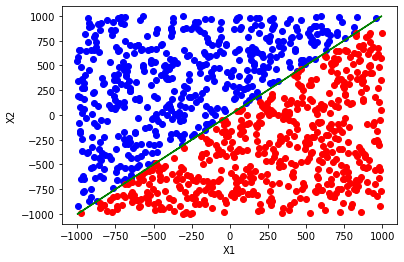

In [25]:
resultado_0x = np.array([])
resultado_0y = np.array([])
resultado_1x = np.array([])
resultado_1y = np.array([])

for i in range (len(dataset)):
    if(dataset[i,2] == 1):
        resultado_0x = np.append(resultado_0x,[dataset[i,0]])
        resultado_0y = np.append(resultado_0y,[dataset[i,1]])
    else:
        resultado_1x = np.append(resultado_1x,[dataset[i,0]])
        resultado_1y = np.append(resultado_1y, [dataset[i,1]])

plt.scatter(resultado_1x,resultado_1y, color='blue')
plt.plot()
        
plt.scatter(resultado_0x,resultado_0y, color='red')
plt.plot()

x2 = (pesos[0]/pesos[2])
x1 = (pesos[0]/pesos[2])/(pesos[1]/pesos[2]) 

m = (0-x2)/x1-0
n = x2 - m*x1

abscissa = np.array([])
ordenada = np.array([])

for i in range(len(dataset)):

    y = m*(dataset[i,0])+n

    abscissa = np.append(abscissa, [y])
    ordenada = np.append(ordenada, dataset[i,0])

plt.xlabel("X1")
plt.ylabel("X2")
plt.plot(abscissa,ordenada,color='green')
plt.show()


Podemos visualizar que os dados representados pela cor azul são aqueles fizeram com que o neurônio fosse ativado, enquanto os da cor vermelha não obtiveram sucesso na ativação.